# 2D Structure Function / CROCO Data

This example will guide you through each step necessary to compute scalar-based structure functions from a 2D CROCO data.

$\textbf{General procedure}:$


1 -  Load a croco dataset, the dataset can be accessed https://doi.org/10.1175/JPO-D-18-0029.1

2 -  Format dataset to match pyturbo_sf inputs

3 -  Calculate second-order 2D longitudinal structure function as a function of separation distances

4 -  Plot the 2D SF with errors and number of bootstraps

5 -  Calculate Isotropic second-order longitudinal & Transverse structure function and their associated errors

6 -  Plot Isotropic Longitudinal and transverse SFs with isotropy and homogeneity errors

7 -  Calculate Isotropic advective-SF $\delta u.\delta ADV$

8 -  Plot Isotropic advective-SF $\delta u.\delta ADV$ with isotropy and homogeneity errors

9 -  Calculate Isotropic scalar-scalar $\delta u \delta T$

10 - Plot Isotropic scalar-scalar $\delta u \delta T$ with isotropy and homogeneity errors

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm
import matplotlib.ticker as ticker
import pyturbo_sf as psf
import pyproj
import numpy as np
linewidth = 2
fontsize = 12
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['savefig.dpi'] = 150
plt.rc('font', family='serif')
import gc

# Load the CROCO Dataset

In [2]:
path_data = '/home/aayouche/warrior/data'
idt = 10
dsh = xr.open_dataset(path_data+'/'+'surface.nc')
dsg = xr.open_dataset(path_data+'/'+'GOM_150_grd.nc')

lon = dsg.lon_rho
lat = dsg.lat_rho

lon_center = np.nanmin(lon)
utm_zone = int(1 + (lon_center + 180.0) / 6.0)

# Create the projection
proj = pyproj.Proj(proj='utm', zone=utm_zone, ellps='WGS84', datum='WGS84')

x, y = proj(lon.values, lat.values) 

X = 0.25*(x[1:,1:] + x[1:,:-1] + x[:-1,:-1] + x[:-1,1:])
Y = 0.25*(y[1:,1:] + y[1:,:-1] + y[:-1,:-1] + y[:-1,1:])


u = np.array(dsh.u.isel(s_rho=0,time=idt))
u = 0.5*(u[1:,:] + u[:-1,:])
v = np.array(dsh.v.isel(s_rho=0,time=idt))
v = 0.5*(v[:,1:] + v[:,:-1])

dudx = np.gradient(u,axis=1)/(2*150.)
dvdx = np.gradient(v,axis=1)/(2*150.)
dudy = np.gradient(u,axis=0)/(2*150.)
dvdy = np.gradient(v,axis=0)/(2*150.)

adv_u = u*dudx + v*dudy

adv_v = v*dudx + v*dvdy

temp = np.array(dsh.temp.isel(s_rho=0,time=idt))

temp = 0.25*(temp[1:,1:] + temp[1:,:-1] + temp[:-1,:-1] + temp[:-1,1:])

gc.collect()

20

# Make A quick Plot

Text(0, 0.5, 'Y [km]')

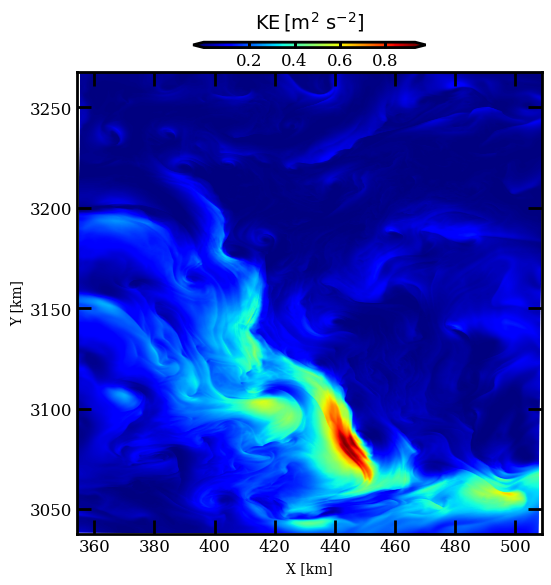

In [3]:
fig,ax = plt.subplots(figsize=(6,6))
im = ax.pcolormesh(X/1.0e3,Y/1.0e3,0.5*(u**2 + v**2),cmap='jet',shading='gouraud')

pos1cb = ax.get_position()
cbar_ax = fig.add_axes([pos1cb.x0+pos1cb.width/4., pos1cb.y0+0.04+pos1cb.height , pos1cb.width/2. , 0.009])
cbar = fig.colorbar(im, cax=cbar_ax,orientation='horizontal',\
                            extend='both',ticks=np.arange(0,1,0.2))
cbar.set_label(r'$ {\rm KE \,  [} {\rm m^{2}~} {\rm s^{-2}]}$',fontsize= fontsize + 2 ,labelpad=10)
cbar.ax.tick_params(labelsize=fontsize,direction='in',width=linewidth,size=4)
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('both')
cbar.outline.set_linewidth( linewidth )
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth( linewidth )
    ax.spines[axis].set_color('k')
ax.tick_params(direction='in',bottom='on',top='on',left='on',right='on')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')

# Format Dataset

In [4]:
# Create the xarray dataset
ds = xr.Dataset({
    'u': (['y', 'x'], u),
    'v': (['y', 'x'], v),
    'adv_u':(['y', 'x'], adv_u),
    'adv_v':(['y', 'x'], adv_v),
    'temperature':(['y', 'x'], temp),

}, coords={
    'x': (['y', 'x'], X),
    'y': (['y', 'x'], Y)
})



In [6]:
ds

<xarray.Dataset> Size: 57MB
Dimensions:      (y: 1537, x: 1025)
Coordinates:
    x            (y, x) float64 13MB 3.542e+05 3.544e+05 ... 5.086e+05 5.088e+05
    y            (y, x) float64 13MB 3.039e+06 3.039e+06 ... 3.267e+06 3.267e+06
Data variables:
    u            (y, x) float32 6MB -0.3907 -0.4025 -0.4012 ... 0.01855 0.01787
    v            (y, x) float32 6MB 0.08256 0.09225 0.1009 ... 0.0189 0.01809
    adv_u        (y, x) float32 6MB 1.877e-05 1.042e-05 ... 2.56e-07 9.305e-08
    adv_v        (y, x) float32 6MB -6.296e-06 -6.236e-06 ... -3.306e-07
    temperature  (y, x) float32 6MB 25.06 25.06 25.06 ... 20.97 20.97 20.97

# Calculate 2D Longitudinal SF

In [5]:
bins = {
    'x': np.logspace(np.log10(150.), np.log10(155.0e3), 12),
    'y': np.logspace(np.log10(150.), np.log10(155.0e3), 12)
}
sf_result = psf.bin_sf_2d(
    ds=ds,
    variables_names=["u","v"],
    order=2,
    bins=bins,
    fun='longitudinal',
    bootsize={'y':32,'x':32},
    initial_nbootstrap=100,
    max_nbootstrap=200,
    step_nbootstrap=50,
    convergence_eps=0.1
)

Dimensions ('y', 'x') are already in the expected order
Using bootsize: {'y': 32, 'x': 32}
Bootstrappable dimensions: ['y', 'x']
Two bootstrappable dimensions. Available spacings: [1, 2, 4, 8, 16, 32]

STARTING BIN_SF WITH FUNCTION TYPE: longitudinal
Variables: ['u', 'v'], Order: 2
Bootstrap parameters: initial=100, max=200, step=50
Convergence threshold: 0.1
Bootstrappable dimensions: ['y', 'x'] (count: 2)

Bin dimensions: y=11, x=11
Total bins: 121
Bin type for x: logarithmic
Bin type for y: logarithmic
Available spacings: [1, 2, 4, 8, 16, 32]

INITIAL BOOTSTRAP PHASE
  Processing spacing 1 with 16 bootstraps
  Processing spacing 2 with 16 bootstraps
  Processing spacing 4 with 16 bootstraps
  Processing spacing 8 with 16 bootstraps
  Processing spacing 16 with 16 bootstraps
  Processing spacing 32 with 16 bootstraps

CALCULATING BIN DENSITIES
Total points collected: 98304
Bins with points: 104/121
Maximum density bin has 4000 points

CALCULATING INITIAL STATISTICS
Marked 17 low-dens

# Plot 2D SFs

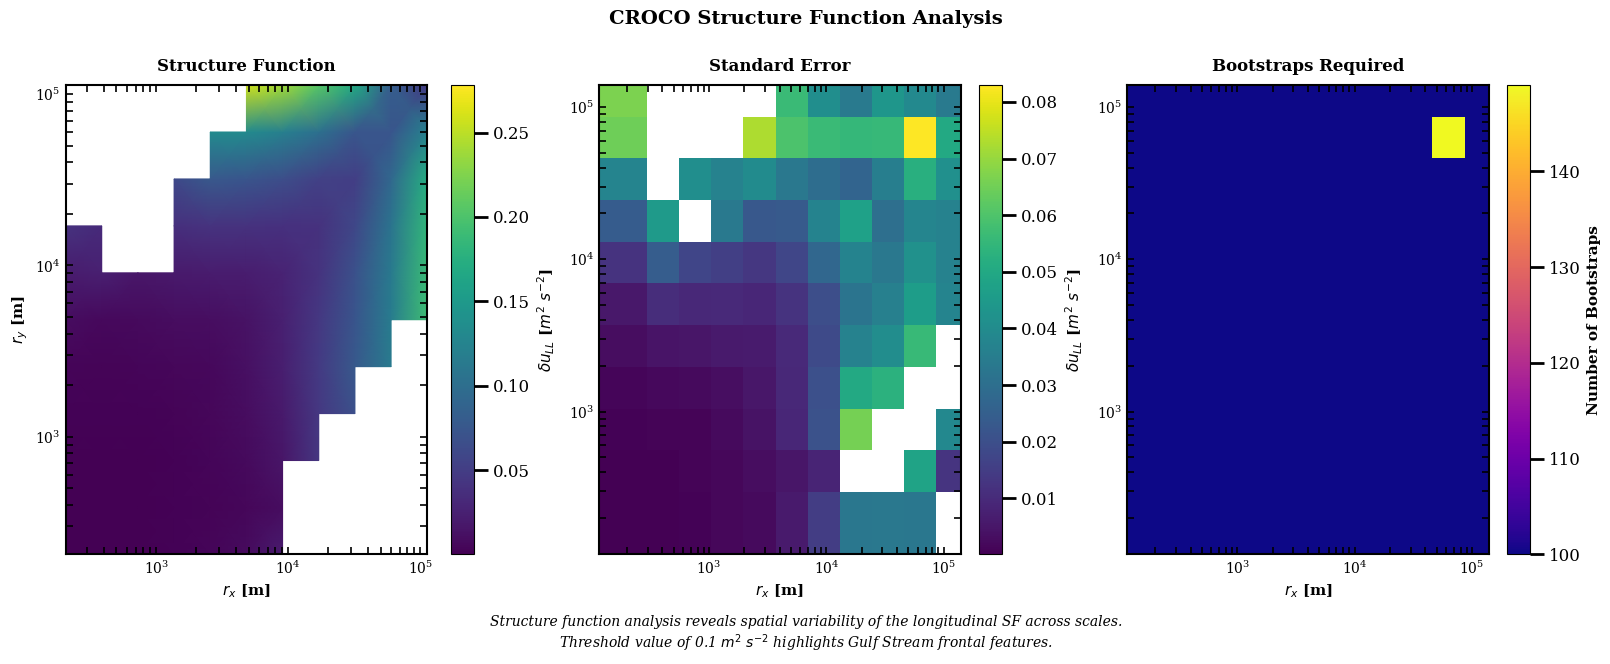

In [9]:
# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5.5), constrained_layout=True)

# Common settings for all plots
plot_titles = ['Structure Function', 'Standard Error', 'Bootstraps Required']
cmaps = ['viridis', 'viridis', 'plasma']
labels = [r'$\delta u_{LL}$ [$m^{2}~s^{-2}$]', r'$\delta u_{LL}$ [$m^{2}~s^{-2}$]', 'Number of Bootstraps']

# Data to plot
data_to_plot = [sf_result.sf.T, sf_result.sf_std.T, sf_result.nbootstraps.T]

for i, (ax, data, title, cmap, label) in enumerate(zip(axes, data_to_plot, plot_titles, cmaps, labels)):
    # Create the plot with specific shading for the first plot
    if i == 0:
        im = ax.pcolormesh(sf_result.x, sf_result.y, data, cmap=cmap, shading='gouraud')
    else:
        im = ax.pcolormesh(sf_result.x, sf_result.y, data, cmap=cmap, shading='auto')
    
    # Add colorbar with proper formatting
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label(label, fontsize=11, fontweight='bold')
    
    # Set axis labels and title
    ax.set_xlabel(r'$r_x$ [m]', fontsize=11, fontweight='bold')
    if i == 0:
        ax.set_ylabel(r'$r_y$ [m]', fontsize=11, fontweight='bold')
    
    # Set log scales
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    # Add title
    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    
    # Customize spines
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
    
    # Customize tick parameters
    ax.tick_params(which='both', direction='in', width=1.2, length=5, 
                  labelsize=10, top=True, right=True)
    

    
    # Add scientific notation for axes
    ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())
    ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())

# Add main title for the entire figure
fig.suptitle('CROCO Structure Function Analysis', fontsize=14, fontweight='bold', y=1.08)

# Add annotation explaining the analysis
fig.text(0.5, -0.08, 
         'Structure function analysis reveals spatial variability of the longitudinal SF across scales.\n'
         'Threshold value of 0.1 $m^{2}~s^{-2}$ highlights Gulf Stream frontal features.',
         ha='center', fontsize=10, fontstyle='italic')

plt.show()

# Calculate ISOTROPIC Longitudinal and Transverse SF 

In [10]:
bin_r = np.logspace(np.log10(150.), np.log10(155.0e3), 20)
bins = {
    'r': bin_r,
}
iso_sf_lon = psf.get_isotropic_sf_2d(
    ds=ds,
    variables_names=["u","v"],
    order=2,
    bins=bins,
    fun='longitudinal',
    bootsize={'y':32,'x':32},
    initial_nbootstrap=100,
    max_nbootstrap=200,
    step_nbootstrap=50,
    convergence_eps=0.1,
    window_size_r=8,
    window_size_theta=10,
)

iso_sf_trans = psf.get_isotropic_sf_2d(
    ds=ds,
    variables_names=["u","v"],
    order=2,
    bins=bins,
    fun='transverse',
    bootsize={'y':32,'x':32},
    initial_nbootstrap=100,
    max_nbootstrap=200,
    step_nbootstrap=50,
    convergence_eps=0.1,
    window_size_r=8,
    window_size_theta=10,
)

Dimensions ('y', 'x') are already in the expected order
Using bootsize: {'y': 32, 'x': 32}
Bootstrappable dimensions: ['y', 'x']
Two bootstrappable dimensions. Available spacings: [1, 2, 4, 8, 16, 32]

STARTING ISOTROPIC_SF WITH FUNCTION TYPE: longitudinal
Variables: ['u', 'v'], Order: 2
Bootstrap parameters: initial=100, max=200, step=50
Convergence threshold: 0.1
Bootstrappable dimensions: ['y', 'x'] (count: 2)

Detected logarithmic binning for radial dimension
Using 19 radial bins and 36 angular bins
Using window size 10 for theta and 8 for r
Available spacings: [1, 2, 4, 8, 16, 32]

INITIAL BOOTSTRAP PHASE
  Processing spacing 1 with 16 bootstraps
  Processing spacing 2 with 16 bootstraps
  Processing spacing 4 with 16 bootstraps
  Processing spacing 8 with 16 bootstraps
  Processing spacing 16 with 16 bootstraps
  Processing spacing 32 with 16 bootstraps

CALCULATING BIN DENSITIES
Total points collected: 98304
Bins with points: 19/19
Maximum density bin has 9808 points

CALCULATIN

# Plot Isotropic Longitudinal and Transverse SF

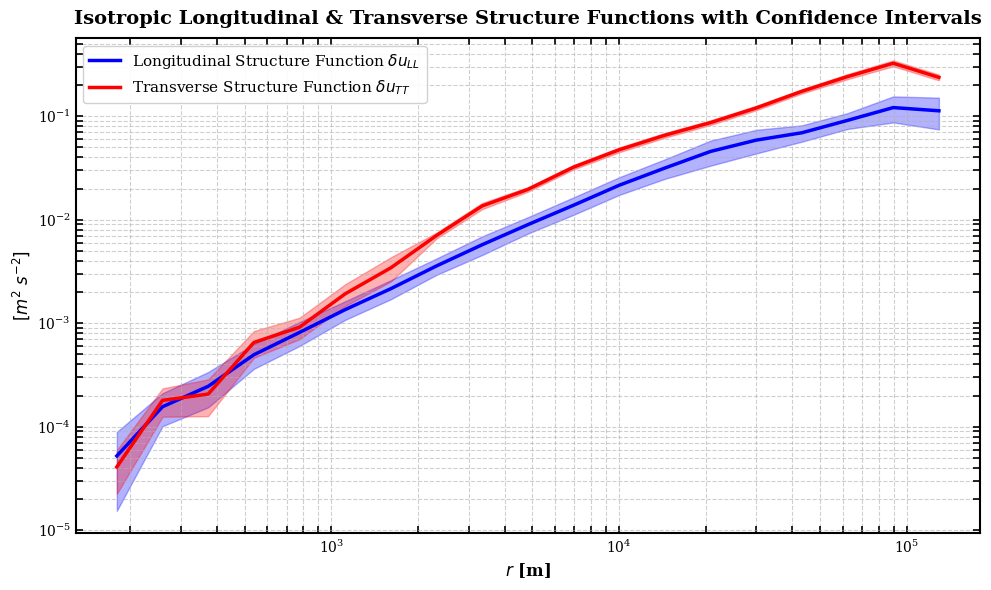

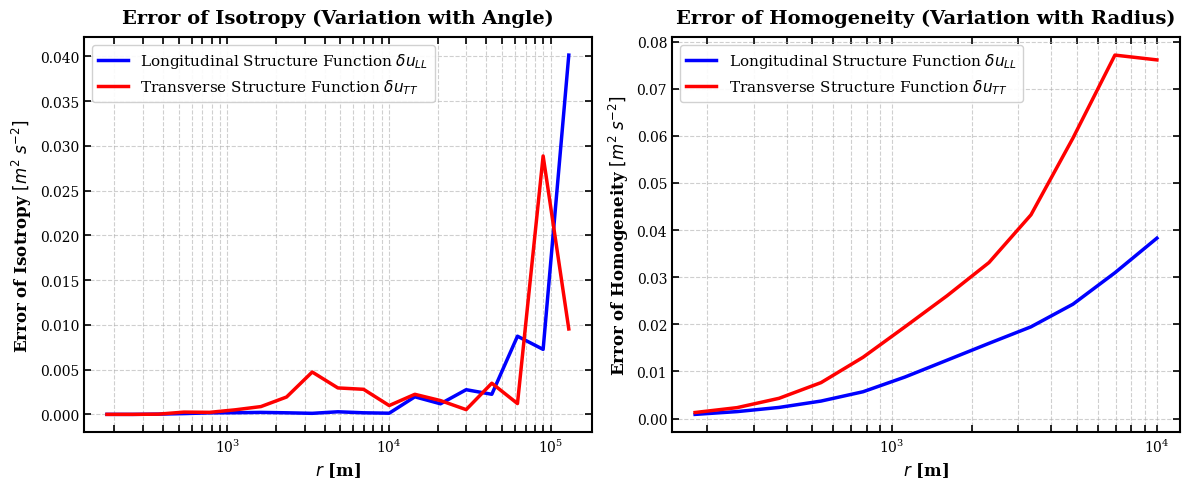

In [11]:
# Create separate figures for better spacing and clarity
plt.figure(figsize=(10, 6))
# Structure Function with Confidence Interval
plt.plot(iso_sf_lon.r, iso_sf_lon.sf, 'b-', linewidth=2.5, label='Longitudinal Structure Function'+' '+'$\delta u_{LL}$')
plt.plot(iso_sf_trans.r, iso_sf_trans.sf, 'r-', linewidth=2.5, label='Transverse Structure Function'+' '+'$\delta u_{TT}$')

plt.fill_between(iso_sf_lon.r, 
                iso_sf_lon.ci_lower, 
                iso_sf_lon.ci_upper, 
                alpha=0.3, color='blue')

plt.fill_between(iso_sf_trans.r, 
                iso_sf_trans.ci_lower, 
                iso_sf_trans.ci_upper, 
                alpha=0.3, color='red')

# Formatting
plt.xlabel(r'$r$ [m]', fontsize=12, fontweight='bold')
plt.ylabel(r'$[m^{2}~s^{-2}]$', fontsize=12, fontweight='bold')
plt.title('Isotropic Longitudinal & Transverse Structure Functions with Confidence Intervals', 
         fontsize=14, fontweight='bold', pad=10)
plt.legend(fontsize=11, frameon=True, facecolor='white', framealpha=0.9)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.yscale('log')
plt.xscale('log')

# Customize spines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# Customize tick parameters
ax.tick_params(which='both', direction='in', width=1.2, length=5, 
              labelsize=10, top=True, right=True)
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())

plt.tight_layout()

# --------------------------------------------------
# Errors of Isotropy and Homogeneity
# --------------------------------------------------
plt.figure(figsize=(12, 5))

# Error of isotropy
plt.subplot(121)
plt.plot(iso_sf_lon.r, iso_sf_lon.error_isotropy, 'b-', linewidth=2.5,label='Longitudinal Structure Function'+' '+'$\delta u_{LL}$')
plt.plot(iso_sf_trans.r, iso_sf_trans.error_isotropy, 'r-', linewidth=2.5,label='Transverse Structure Function'+' '+'$\delta u_{TT}$')

plt.xlabel(r'$r$ [m]', fontsize=12, fontweight='bold')
plt.ylabel('Error of Isotropy'+' '+r'$[m^{2}~s^{-2}]$', fontsize=12, fontweight='bold')
plt.title('Error of Isotropy (Variation with Angle)', 
         fontsize=14, fontweight='bold', pad=10)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.xscale('log')
plt.legend(fontsize=11, frameon=True, facecolor='white', framealpha=0.9)

# Customize spines and ticks
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.tick_params(which='both', direction='in', width=1.2, length=5, 
              labelsize=10, top=True, right=True)
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())

# Error of homogeneity
plt.subplot(122)
plt.plot(iso_sf_lon.r_subset, iso_sf_lon.error_homogeneity, 'b-', linewidth=2.5,label='Longitudinal Structure Function'+' '+'$\delta u_{LL}$')
plt.plot(iso_sf_trans.r_subset, iso_sf_trans.error_homogeneity, 'r-', linewidth=2.5,label='Transverse Structure Function'+' '+'$\delta u_{TT}$')
plt.xlabel(r'$r$ [m]', fontsize=12, fontweight='bold')
plt.ylabel('Error of Homogeneity'+' '+r'$[m^{2}~s^{-2}]$', fontsize=12, fontweight='bold')
plt.title('Error of Homogeneity (Variation with Radius)', 
         fontsize=14, fontweight='bold', pad=10)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.xscale('log')
plt.legend(fontsize=11, frameon=True, facecolor='white', framealpha=0.9)

# Customize spines and ticks
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.tick_params(which='both', direction='in', width=1.2, length=5, 
              labelsize=10, top=True, right=True)
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())

plt.tight_layout()

plt.show()

# Calculate Isotropic advective-SF $\delta u.\delta ADV$

In [12]:
bin_r = np.logspace(np.log10(150.), np.log10(155.0e3), 20)
bins = {
    'r': bin_r,
}
iso_sf_adv = psf.get_isotropic_sf_2d(
    ds=ds,
    variables_names=["u","v","adv_u","adv_v"],
    order=1,
    bins=bins,
    fun='advective',
    bootsize={'y':32,'x':32},
    initial_nbootstrap=100,
    max_nbootstrap=200,
    step_nbootstrap=50,
    convergence_eps=1.0e-7,
    window_size_r=8,
    window_size_theta=10,
)



Dimensions ('y', 'x') are already in the expected order
Using bootsize: {'y': 32, 'x': 32}
Bootstrappable dimensions: ['y', 'x']
Two bootstrappable dimensions. Available spacings: [1, 2, 4, 8, 16, 32]

STARTING ISOTROPIC_SF WITH FUNCTION TYPE: advective
Variables: ['u', 'v', 'adv_u', 'adv_v'], Order: 1
Bootstrap parameters: initial=100, max=200, step=50
Convergence threshold: 1e-07
Bootstrappable dimensions: ['y', 'x'] (count: 2)

Detected logarithmic binning for radial dimension
Using 19 radial bins and 36 angular bins
Using window size 10 for theta and 8 for r
Available spacings: [1, 2, 4, 8, 16, 32]

INITIAL BOOTSTRAP PHASE
  Processing spacing 1 with 16 bootstraps
  Processing spacing 2 with 16 bootstraps
  Processing spacing 4 with 16 bootstraps
  Processing spacing 8 with 16 bootstraps
  Processing spacing 16 with 16 bootstraps
  Processing spacing 32 with 16 bootstraps

CALCULATING BIN DENSITIES
Total points collected: 98304
Bins with points: 19/19
Maximum density bin has 9808 p

# Plot Isotropic advective-SF $\delta u.\delta ADV$

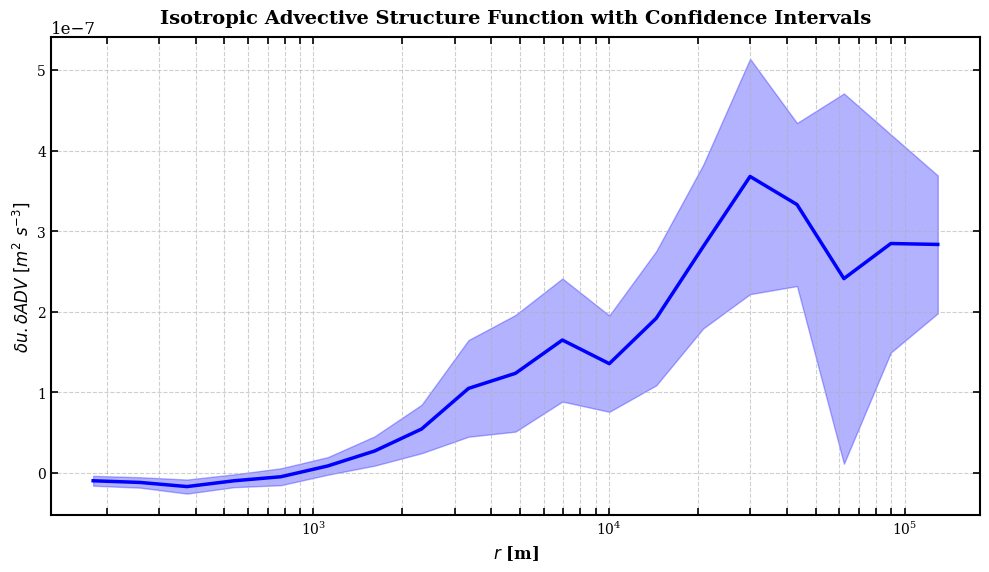

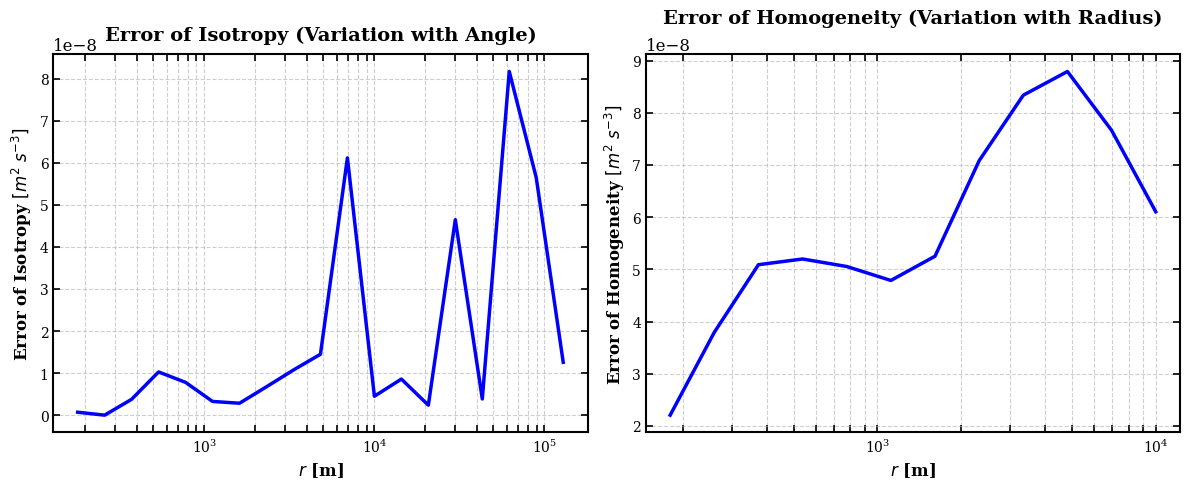

In [13]:
# Create separate figures for better spacing and clarity
plt.figure(figsize=(10, 6))
# Structure Function with Confidence Interval
plt.plot(iso_sf_adv.r, iso_sf_adv.sf, 'b-', linewidth=2.5)

plt.fill_between(iso_sf_adv.r, 
                iso_sf_adv.ci_lower, 
                iso_sf_adv.ci_upper, 
                alpha=0.3, color='blue')



# Formatting
plt.xlabel(r'$r$ [m]', fontsize=12, fontweight='bold')
plt.ylabel(r'$\delta u.\delta ADV~[m^{2}~s^{-3}]$', fontsize=12, fontweight='bold')
plt.title('Isotropic Advective Structure Function with Confidence Intervals', 
         fontsize=14, fontweight='bold', pad=10)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.xscale('log')

# Customize spines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# Customize tick parameters
ax.tick_params(which='both', direction='in', width=1.2, length=5, 
              labelsize=10, top=True, right=True)
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())

plt.tight_layout()

# --------------------------------------------------
# Errors of Isotropy and Homogeneity
# --------------------------------------------------
plt.figure(figsize=(12, 5))

# Error of isotropy
plt.subplot(121)
plt.plot(iso_sf_adv.r, iso_sf_adv.error_isotropy, 'b-', linewidth=2.5)

plt.xlabel(r'$r$ [m]', fontsize=12, fontweight='bold')
plt.ylabel('Error of Isotropy'+' '+r'$[m^{2}~s^{-3}]$', fontsize=12, fontweight='bold')
plt.title('Error of Isotropy (Variation with Angle)', 
         fontsize=14, fontweight='bold', pad=10)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.xscale('log')

# Customize spines and ticks
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.tick_params(which='both', direction='in', width=1.2, length=5, 
              labelsize=10, top=True, right=True)
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())

# Error of homogeneity
plt.subplot(122)
plt.plot(iso_sf_adv.r_subset, iso_sf_adv.error_homogeneity, 'b-', linewidth=2.5)
plt.xlabel(r'$r$ [m]', fontsize=12, fontweight='bold')
plt.ylabel('Error of Homogeneity'+' '+r'$[m^{2}~s^{-3}]$', fontsize=12, fontweight='bold')
plt.title('Error of Homogeneity (Variation with Radius)', 
         fontsize=14, fontweight='bold', pad=10)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.xscale('log')

# Customize spines and ticks
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.tick_params(which='both', direction='in', width=1.2, length=5, 
              labelsize=10, top=True, right=True)
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())

plt.tight_layout()

plt.show()

# Calculate Isotropic $\delta u \delta T$

In [14]:
bin_r = np.logspace(np.log10(150.), np.log10(155.0e3), 20)
bins = {
    'r': bin_r,
}
iso_sf_scalar = psf.get_isotropic_sf_2d(
    ds=ds,
    variables_names=["u","temperature"],
    order=(1,1),
    bins=bins,
    fun='scalar_scalar',
    bootsize={'y':32,'x':32},
    initial_nbootstrap=100,
    max_nbootstrap=200,
    step_nbootstrap=50,
    convergence_eps=0.01,
    window_size_r=8,
    window_size_theta=10,
)



Dimensions ('y', 'x') are already in the expected order
Using bootsize: {'y': 32, 'x': 32}
Bootstrappable dimensions: ['y', 'x']
Two bootstrappable dimensions. Available spacings: [1, 2, 4, 8, 16, 32]

STARTING ISOTROPIC_SF WITH FUNCTION TYPE: scalar_scalar
Variables: ['u', 'temperature'], Order: (1, 1)
Bootstrap parameters: initial=100, max=200, step=50
Convergence threshold: 0.01
Bootstrappable dimensions: ['y', 'x'] (count: 2)

Detected logarithmic binning for radial dimension
Using 19 radial bins and 36 angular bins
Using window size 10 for theta and 8 for r
Available spacings: [1, 2, 4, 8, 16, 32]

INITIAL BOOTSTRAP PHASE
  Processing spacing 1 with 16 bootstraps
  Processing spacing 2 with 16 bootstraps
  Processing spacing 4 with 16 bootstraps
  Processing spacing 8 with 16 bootstraps
  Processing spacing 16 with 16 bootstraps
  Processing spacing 32 with 16 bootstraps

CALCULATING BIN DENSITIES
Total points collected: 98304
Bins with points: 19/19
Maximum density bin has 9808 p

# Plot Isotropic $\delta u \delta T$

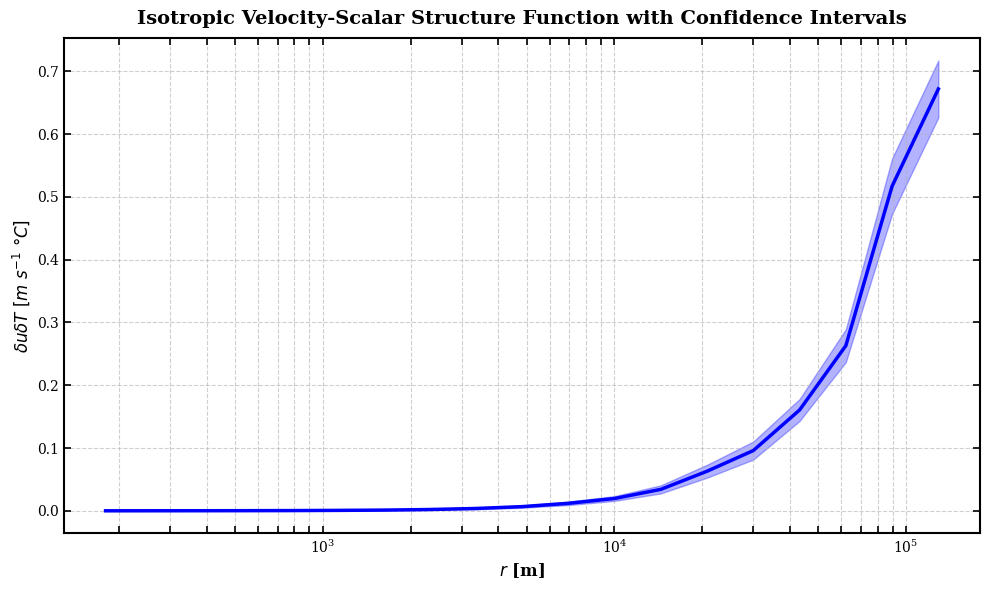

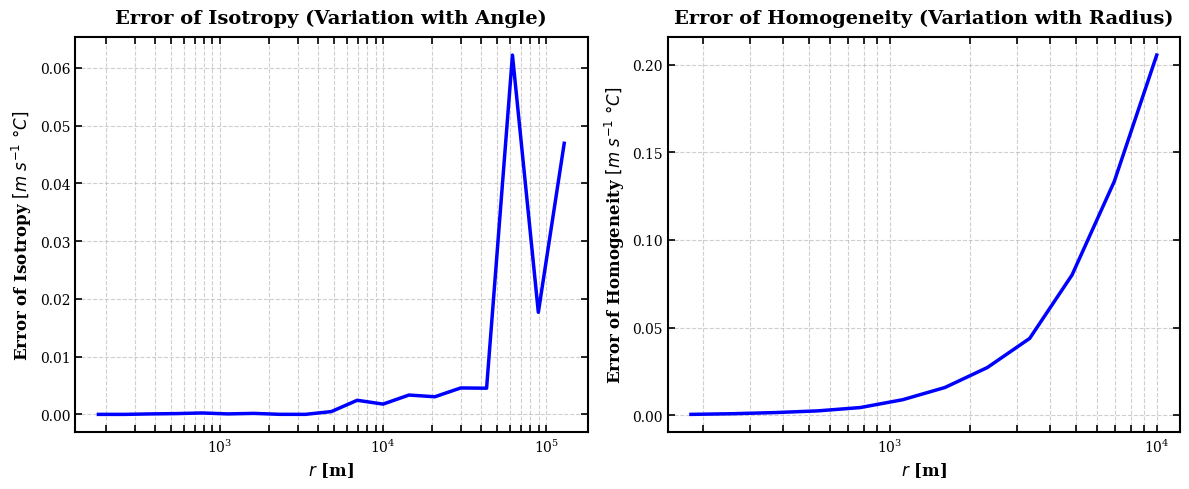

In [15]:
# Create separate figures for better spacing and clarity
plt.figure(figsize=(10, 6))
# Structure Function with Confidence Interval
plt.plot(iso_sf_scalar.r, iso_sf_scalar.sf, 'b-', linewidth=2.5)

plt.fill_between(iso_sf_scalar.r, 
                iso_sf_scalar.ci_lower, 
                iso_sf_scalar.ci_upper, 
                alpha=0.3, color='blue')



# Formatting
plt.xlabel(r'$r$ [m]', fontsize=12, fontweight='bold')
plt.ylabel(r'$\delta u \delta T~[m~s^{-1}~°C]$', fontsize=12, fontweight='bold')
plt.title('Isotropic Velocity-Scalar Structure Function with Confidence Intervals', 
         fontsize=14, fontweight='bold', pad=10)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.xscale('log')

# Customize spines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# Customize tick parameters
ax.tick_params(which='both', direction='in', width=1.2, length=5, 
              labelsize=10, top=True, right=True)
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())

plt.tight_layout()

# --------------------------------------------------
# Errors of Isotropy and Homogeneity
# --------------------------------------------------
plt.figure(figsize=(12, 5))

# Error of isotropy
plt.subplot(121)
plt.plot(iso_sf_scalar.r, iso_sf_scalar.error_isotropy, 'b-', linewidth=2.5)

plt.xlabel(r'$r$ [m]', fontsize=12, fontweight='bold')
plt.ylabel('Error of Isotropy'+' '+r'$[m~s^{-1}~°C]$', fontsize=12, fontweight='bold')
plt.title('Error of Isotropy (Variation with Angle)', 
         fontsize=14, fontweight='bold', pad=10)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.xscale('log')

# Customize spines and ticks
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.tick_params(which='both', direction='in', width=1.2, length=5, 
              labelsize=10, top=True, right=True)
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())

# Error of homogeneity
plt.subplot(122)
plt.plot(iso_sf_scalar.r_subset, iso_sf_scalar.error_homogeneity, 'b-', linewidth=2.5)
plt.xlabel(r'$r$ [m]', fontsize=12, fontweight='bold')
plt.ylabel('Error of Homogeneity'+' '+r'$[m~s^{-1}~°C]$', fontsize=12, fontweight='bold')
plt.title('Error of Homogeneity (Variation with Radius)', 
         fontsize=14, fontweight='bold', pad=10)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.xscale('log')

# Customize spines and ticks
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.tick_params(which='both', direction='in', width=1.2, length=5, 
              labelsize=10, top=True, right=True)
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())

plt.tight_layout()

plt.show()